In [1]:
import pandas as pd
import filecmp
import os

In [2]:
screens = [
    'Human_InVitro_294T_Apobec_D14_Input.txt',
    'Human_InVitro_294T_TadA_D14_Input.txt',
    'Human_InVitro_SK-ES_Apobec_D14_Input.txt',
    'Human_InVitro_SK-ES_TadA_D17_Input.txt',
    'Human_InVitro_SW480_Apobec_D14_Input.txt',
    'Human_InVitro_SW480_TadA_D14_Input.txt',
    ]
workdir = '../tests'
input_gene = 'SETDB1'
input_uniprot = 'Q15047'
structureid = f"AF-{input_uniprot}-F1-model_v4"

## af_structural_features.py (1)

In [3]:
# ! pip install DSSPparser
# ! pip install wget

In [3]:
# this is a requisite step to prioritizing by conservation
from af_structural_features import af_structural_features

In [4]:
af_structural_features(
    workdir=workdir, 
    input_gene=input_gene, 
    input_uniprot=input_uniprot, 
    structureid=structureid
    )

/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/af_structural_features.py:176: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  norm_ASA = round(float(dssp_ASA) / float(Gly_X_Gly), 2)


,unipos,unires,x_coord,y_coord,z_coord,bfactor_pLDDT,Naa_count,Naa,Naa_pos,SS9,...,ACC,RSA,exposure,PHI,normPHI,PSI,normPSI,dBurial,normSumdBurial,pLDDT_dis
0,1,M,40.740,39.109,-6.115,36.75,1,S,2,L,...,233,1.04,exposed,360.0,2.00,157.3,0.87,0.00,0.000,very low
1,2,S,37.812,38.895,-3.704,32.83,2,M;S,1;3,L,...,103,0.66,medexposed,35.4,0.20,133.7,0.74,0.38,0.076,very low
2,3,S,35.498,37.485,-2.174,32.79,2,S;L,2;4,L,...,99,0.64,medexposed,179.7,1.00,177.6,0.99,0.40,0.120,very low
3,4,L,32.875,36.126,0.319,42.90,2,S;P,3;5,L,...,165,0.82,exposed,94.0,0.52,156.7,0.87,0.22,0.079,very low
4,5,P,31.112,32.952,1.735,39.74,2,L;G,4;6,L,...,115,0.72,medexposed,-102.6,-0.57,165.8,0.92,0.32,0.090,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,3.341,-6.712,-10.508,85.91,3,C;G;R,1286;1288;1289,L,...,104,0.38,medburied,-63.4,-0.35,-9.9,-0.06,0.66,0.594,confident
1287,1288,G,5.709,-4.495,-12.671,86.20,6,E;D;C;C;R;R,1146;1147;1279;1286;1287;1289,S,...,9,0.09,buried,71.4,0.40,-39.9,-0.22,0.95,0.817,confident
1288,1289,R,2.800,-4.128,-15.192,86.79,7,L;L;C;R;G;L;L,1277;1278;1279;1287;1288;1290;1291,B,...,69,0.25,medburied,-126.4,-0.70,162.4,0.90,0.79,0.648,confident
1289,1290,L,-0.974,-3.633,-15.073,80.70,7,Y;V;L;L;C;R;L,1267;1269;1277;1278;1279;1289;1291,L,...,11,0.05,buried,-104.3,-0.58,-44.6,-0.25,0.99,0.742,confident


In [5]:
path1 = '../tests/SETDB1/SETDB1/AF_Q15047.pdb',                           '../tests/SETDB1/SETDB1/AF_Q15047.pdb'
path2 = '../tests/SETDB1/AF-Q15047-F1-model_v4_coord_struc_features.tsv', '../tests/SETDB1/SETDB1/AF-Q15047-F1-model_v4_coord_struc_features.tsv'
path3 = '../tests/SETDB1/AF-Q15047-F1-model_v4_dssp_parsed.tsv',          '../tests/SETDB1/SETDB1/AF-Q15047-F1-model_v4_dssp_parsed.tsv'
path4 = '../tests/SETDB1/AF-Q15047-F1-model_v4_processed.pdb',            '../tests/SETDB1/SETDB1/AF-Q15047-F1-model_v4_processed.pdb'
path5 = '../tests/SETDB1/Q15047 (1).fasta',                               '../tests/SETDB1/Q15047.fasta'
path6 = '../tests/SETDB1/SETDB1_Q15047.tsv',                              '../tests/SETDB1/SETDB1/SETDB1_Q15047.tsv'
paths = [path1, path2, path3, path4, path5, path6]

for path in paths: 
    if os.path.exists(path[0]) and os.path.exists(path[1]): 
        if not filecmp.cmp(path[0], path[1]):
            print(path[0], path[1])
        else: 
            print('Passed comparsion!')

Passed comparsion!
Passed comparsion!
Passed comparsion!
Passed comparsion!
Passed comparsion!
Passed comparsion!


## preprocess_be_results.py (3.1)

In [4]:
from preprocess_be_results import parse_base_editing_results

Human_InVitro_294T_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5203.0 0.27775308830665546
Nonsense vs No mutation: 2506.0 0.2608706384740007
Nonsense vs Silent: 1803.0 0.24557416370880203
No mutation vs Silent: 10178.0 0.9214706032590196

Human_InVitro_294T_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 8506.0 0.8707578845218364

Human_InVitro_SK-ES_Apobec_D14_Input.txt


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)


Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5573.0 0.6324443593517178
Nonsense vs No mutation: 2678.0 0.5679899176749412
Nonsense vs Silent: 1925.0 0.5238232060741514
No mutation vs Silent: 10262.0 0.9847223016764184

Human_InVitro_SK-ES_TadA_D17_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7643.0 0.11881211072193099


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)



Human_InVitro_SW480_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 2427.0 1.6984223621187785e-08
Nonsense vs No mutation: 1191.0 8.57141567900219e-08
Nonsense vs Silent: 746.0 1.208578432773731e-08
No mutation vs Silent: 10293.0 0.949670567871975

Human_InVitro_SW480_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7227.0 0.025534008934151198



/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)


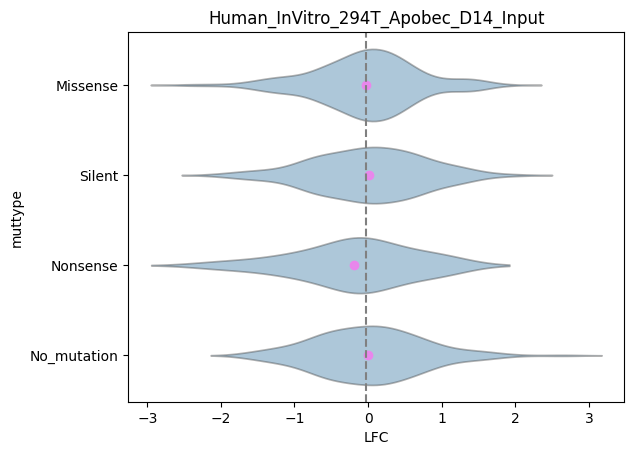

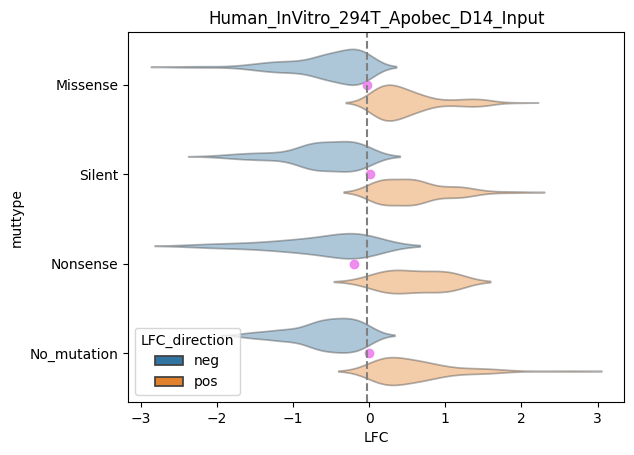

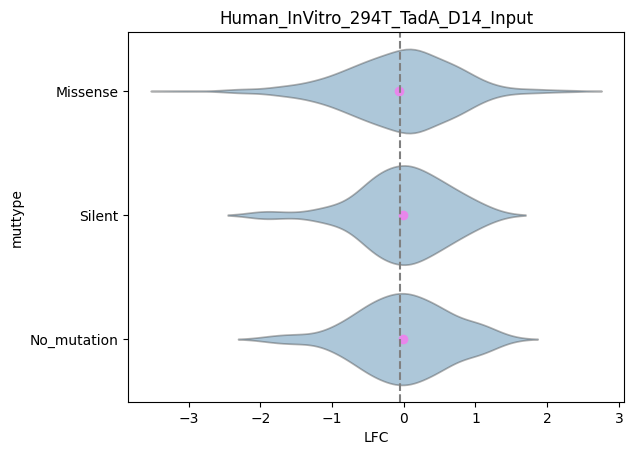

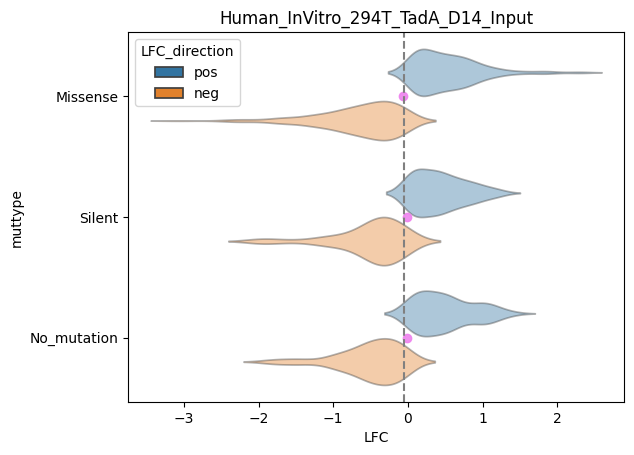

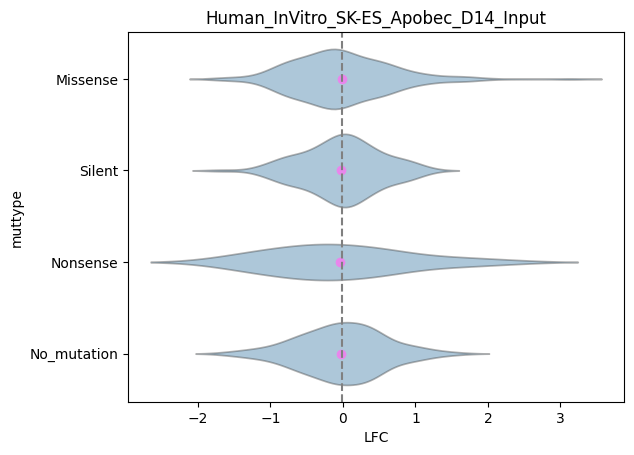

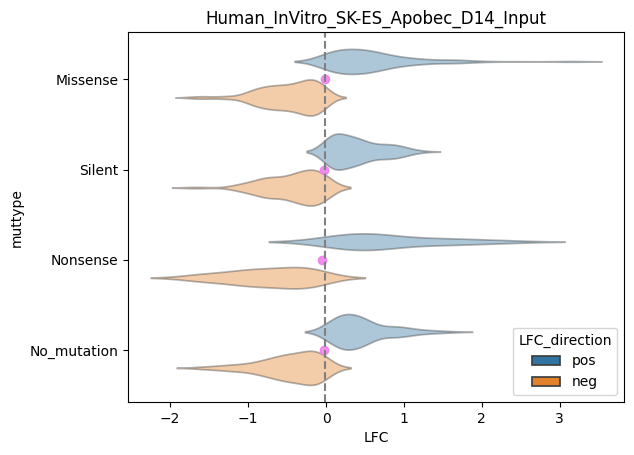

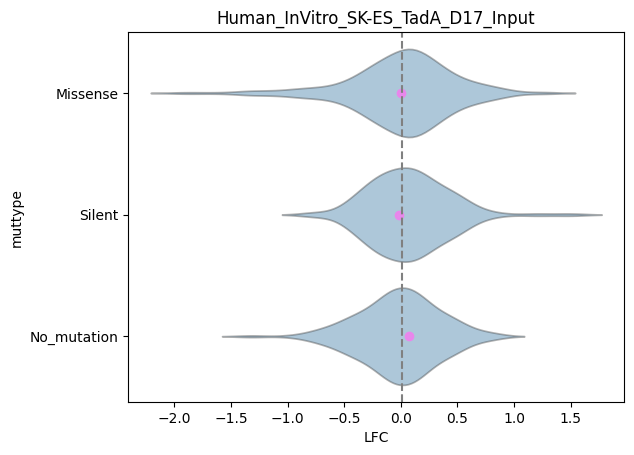

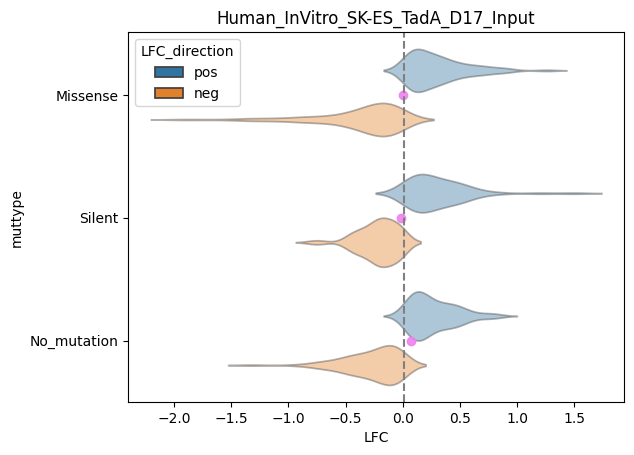

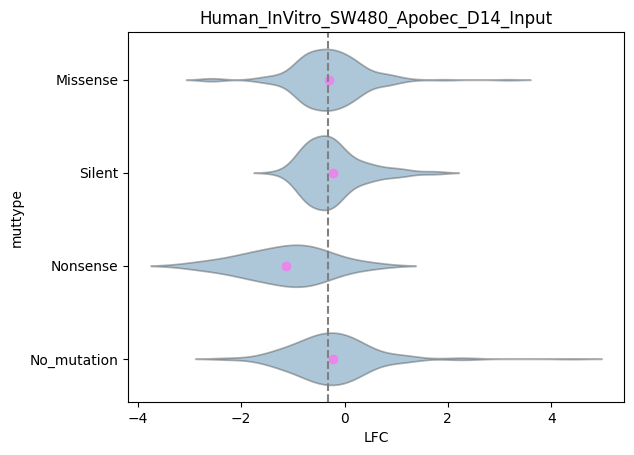

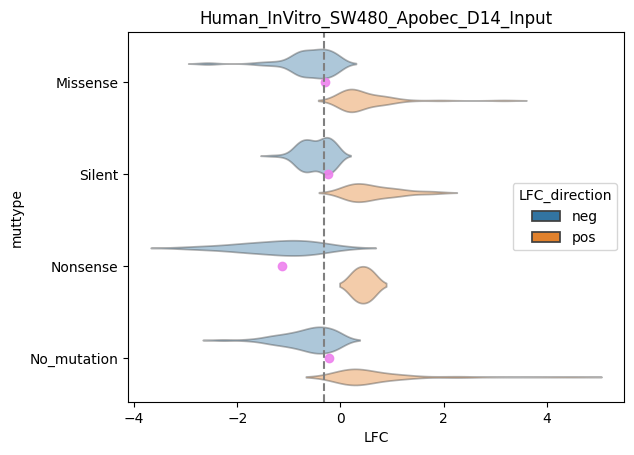

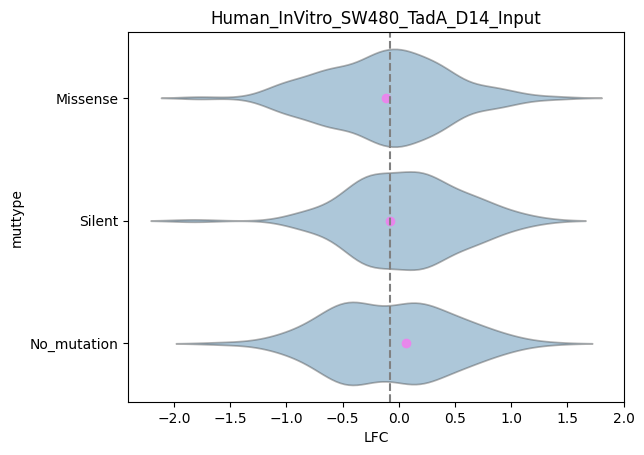

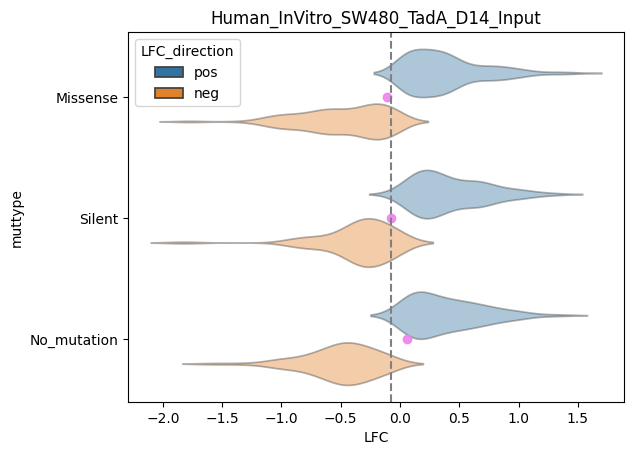

In [5]:
vals = ['D14_Input', 'D14_Input', 'D14_Input', 'D17_Input', 'D14_Input', 'D14_Input', ]

for screen, val in zip(screens, vals): 
    print(screen)
    df = pd.read_csv(workdir + '/rawdata/' + screen, sep='\t')
    parse_base_editing_results(df_InputGene = df, 
                               workdir      = workdir, 
                               input_gene   = input_gene, 
                               input_screen = screen, 
                               mut_col='Histogram_Category', val_col=val, 
                               gene_col='TargetGeneSymbol', edits_col='AminoAcidEdits',
                               )
    print()

In [8]:
# check output with previous output
for f in os.listdir('../tests/SETDB1/screendata'):
    path1 = '../tests/SETDB1/screendata/'+f
    path2 = '../tests/SETDB1/SETDB1/screendata/'+f
    if os.path.exists(path1) and os.path.exists(path2): 
        if not filecmp.cmp(path1, path2):
            print(f)
    else: 
        print('A file doesnt exist', path1)

## randomize_preprocessed_be_results.py (3.1.5)

In [9]:
from randomize_preprocessed_be_results import randomize_be_results

In [10]:
# this cell would take 2x time with original code

for screen in screens: 
    print(screen)
    screen = screen.split('.')[0]
    df = pd.read_csv(workdir + '/SETDB1/screendata/' + input_gene + '_' + screen + '_Missense_edits_list.tsv', sep='\t')
    randomize_be_results(df_missense=df, 
                         workdir=workdir, 
                         input_gene=input_gene, 
                         input_screen=screen)


Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## conservation.py (2)

In [3]:
from conservation import conservation

In [4]:
df_alignconserv, df_residuemap = conservation(workdir, 
                                              input_human_gene=input_gene, input_mouse_gene='Setdb1', 
                                              input_human_uniid=input_uniprot, input_mouse_uniid='D3YYC3', # O88974
                                              email='xiaohu@g.harvard.edu', title='samplejob', 
                                              )
# block takes ~1 min due to calls to MUSCLE

Job ID: muscle-R20240709-212030-0355-85243399-p1m


In [5]:
path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
if os.path.exists(path1) and os.path.exists(path2): 
    if not filecmp.cmp(path1, path2):
        print(path1, path2)
    else: 
        print('Passed comparsion!')

path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
if os.path.exists(path1) and os.path.exists(path2): 
    if not filecmp.cmp(path1, path2):
        print(path1, path2)
    else: 
        print('Passed comparsion!')

Passed comparsion!
Passed comparsion!


## prioritize_by_conservation.py (3.2)

In [3]:
from prioritize_by_conservation import prioritize_by_conservation

In [4]:
df_struc = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")
df_consrv = pd.read_csv(f"{workdir}/{input_gene}/Human{input_gene}_MouseSetdb1_residuemap_conservation.tsv", sep = '\t')

for screen in screens: 
    prioritize_by_conservation(
        df_struc     =df_struc, 
        df_consrv    =df_consrv, 
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

In [7]:
test_files = [
              'SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv',
              ]
dir1 = '../tests/SETDB1/screendata/'
dir2 = '../tests/SETDB1/SETDB1/screendata/'

for file in test_files: 
    if not filecmp.cmp(dir1+file, dir2+file):
        print(file)
        with open(dir1+file, 'r') as file1:
            data1 = file1.read().replace('\n', '')
        with open(dir2+file, 'r') as file2:
            data2 = file2.read().replace('\n', '')
        # for d1, d2 in zip(data1, data2): 
        #     if d1 != d2: 
        #         print(d1, d2)
    else: 
        print('Passed comparsion!')

# files are not exactly the same
    # there are some discrepancies for capital lowercase, and order

SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv


## randomize_by_conservation.py (3.2.5)

In [3]:
from randomize_by_conservation import randomize_by_conservation

In [5]:
structureid = f"AF-{input_uniprot}-F1-model_v4"

for screen in screens: 
    print(screen)
    randomize_by_conservation(
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## calculate_lfc3d.py (3.3)

In [8]:
from calculate_lfc3d import calculate_lfc3d

In [9]:
structureid = f"AF-{input_uniprot}-F1-model_v4"
df_str_cons = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")

for screen in screens: 
    print(screen)
    calculate_lfc3d(
        df_str_cons  =df_str_cons, 
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
    )

Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt


KeyboardInterrupt: 

## average_split_lfc3d.py (3.3.5)

In [5]:
from average_split_lfc3d import average_and_split

In [6]:
for screen in screens: 
        print(screen)
        screen_name = screen.split('.')[0]
        df_str_cons_3daggr = pd.read_csv(f"{workdir}/{input_gene}/LFC3D/{input_gene}_{screen_name}_LFC_LFC3D_per_Random_LFC3Dr.tsv", sep = "\t")
        average_and_split(
                 df_LFC_LFCrN_LFC3D_LFC3DrN=df_str_cons_3daggr, 
                 workdir=workdir, 
                 input_gene=input_gene,
                 input_screen=screen, 
                 )

Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## binning_lfc3d.py (3.4)

In [3]:
from binning_lfc3d import binning_lfc3d

In [4]:
for screen in screens: 
        print(screen)
        screen_name = screen.split('.')[0]
        df_bidir = pd.read_csv(f"{workdir}/{input_gene}/LFC3D/{input_gene}_{screen_name}_LFC_LFC3D_LFC3Dr_bidirectional.tsv", sep = "\t")
        binning_lfc3d(
                 df_LFC_LFC3D=df_bidir, 
                 workdir=workdir, 
                 input_gene=input_gene,
                 input_screen=screen, 
                 )

Human_InVitro_294T_Apobec_D14_Input.txt
length of neg: 432
length of pos: 342
NEG_10p_v -1.075
POS_90p_v 1.0855
NEG_05p_v -1.41
POS_95p_v 1.4125
Human_InVitro_294T_TadA_D14_Input.txt
length of neg: 451
length of pos: 382
NEG_10p_v -1.346
POS_90p_v 0.863
NEG_05p_v -1.621
POS_95p_v 0.999
Human_InVitro_SK-ES_Apobec_D14_Input.txt
length of neg: 409
length of pos: 365
NEG_10p_v -0.83
POS_90p_v 0.874
NEG_05p_v -0.951
POS_95p_v 1.012
Human_InVitro_SK-ES_TadA_D17_Input.txt
length of neg: 392
length of pos: 441
NEG_10p_v -0.9066
POS_90p_v 0.577
NEG_05p_v -1.3277
POS_95p_v 0.707
Human_InVitro_SW480_Apobec_D14_Input.txt
length of neg: 575
length of pos: 198
NEG_10p_v -1.166
POS_90p_v 0.799
NEG_05p_v -1.414
POS_95p_v 0.9314
Human_InVitro_SW480_TadA_D14_Input.txt
length of neg: 497
length of pos: 335
NEG_10p_v -0.784
POS_90p_v 0.721
NEG_05p_v -0.989
POS_95p_v 0.786


## metaaggregation.py (4)

In [3]:
from metaaggregation import metaaggregation

/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/metaaggregation.py:142: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  df_METAggregation.to_csv(filename, "\t", index=False)


{'mannwhitneyu U1': np.float64(833251.0), 'mannwhitneyu p': np.float64(0.9955361884745946), 'pearsonr r': np.float64(1.0), 'pearsonr p': np.float64(0.0), 'sum min': np.float64(-2.509), 'sum mean': np.float64(-0.17438419829589466), 'sum med': np.float64(0.0), 'sum std': np.float64(0.37989831915579647), 'z': -11.649474552924133, 'p cdf': np.float64(1.1543899301318932e-31), 'p sf': np.float64(1.1543899301318932e-31)}
{'mannwhitneyu U1': np.float64(833353.0), 'mannwhitneyu p': np.float64(0.9993489107536874), 'pearsonr r': np.float64(1.0), 'pearsonr p': np.float64(0.0), 'sum min': np.float64(0.0), 'sum mean': np.float64(0.11491479473276531), 'sum med': np.float64(0.0), 'sum std': np.float64(0.2826509648457493), 'z': -16.681049708448132, 'p cdf': np.float64(9.001374123629997e-63), 'p sf': np.float64(9.001374123629997e-63)}
length of SUM_LFC3D_neg: 432
length of SUM_LFC3D_pos: 342



<Figure size 4800x2400 with 0 Axes>

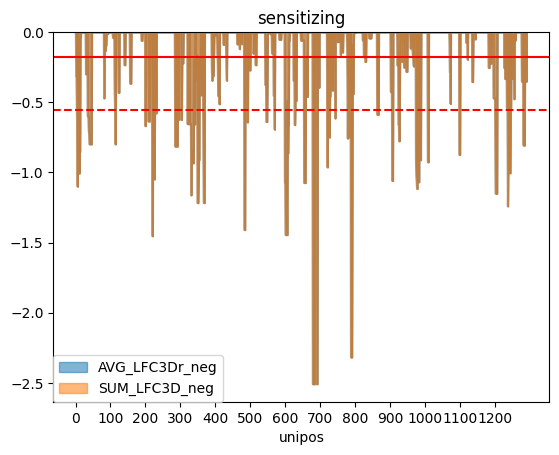

<Figure size 4800x2400 with 0 Axes>

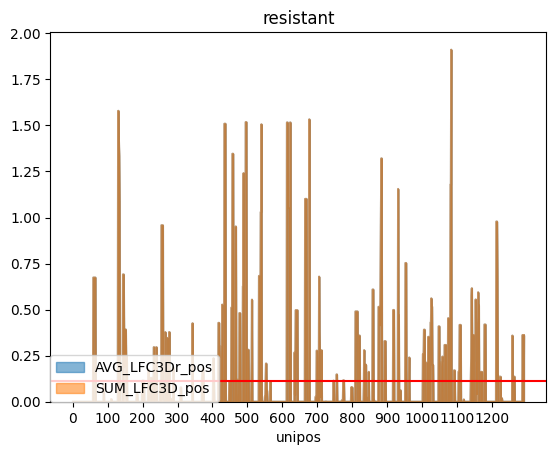

<Figure size 6000x6000 with 0 Axes>

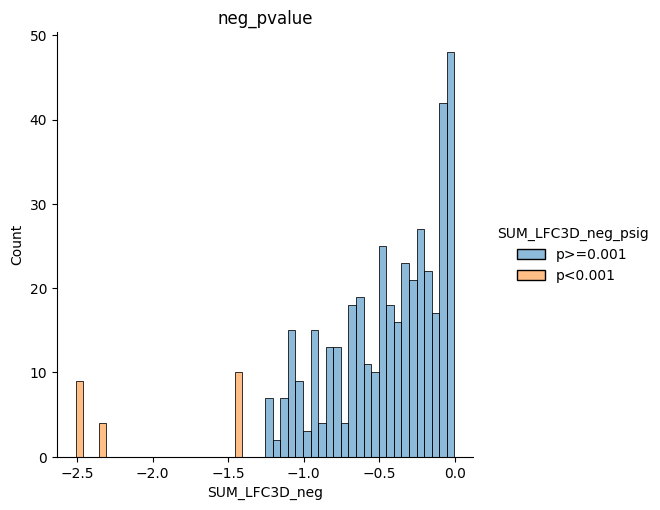

<Figure size 6000x6000 with 0 Axes>

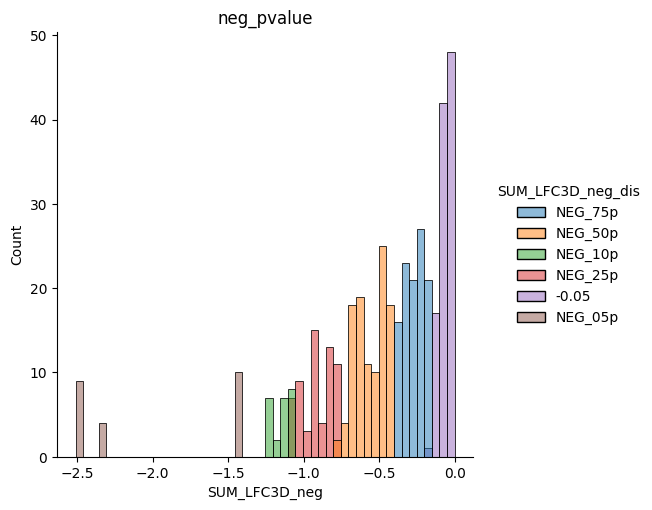

<Figure size 6000x6000 with 0 Axes>

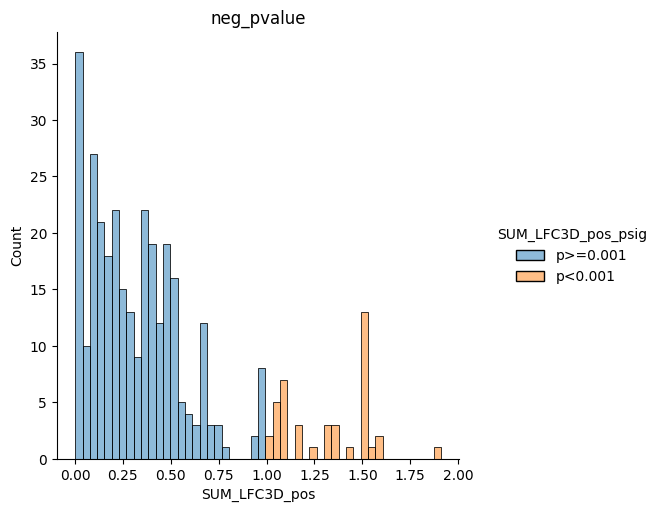

<Figure size 6000x6000 with 0 Axes>

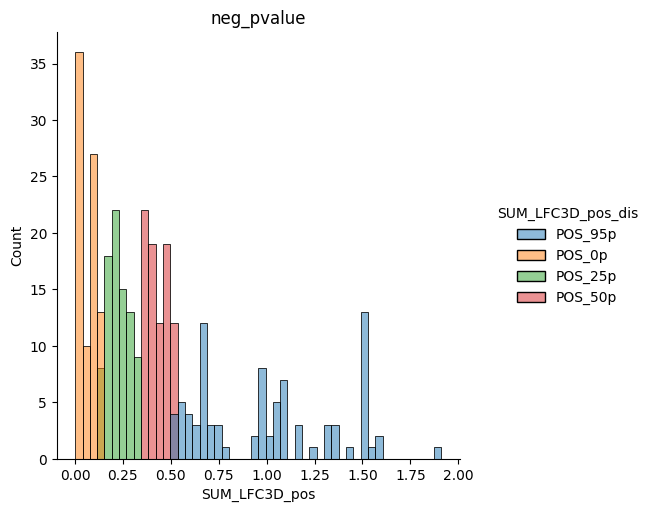

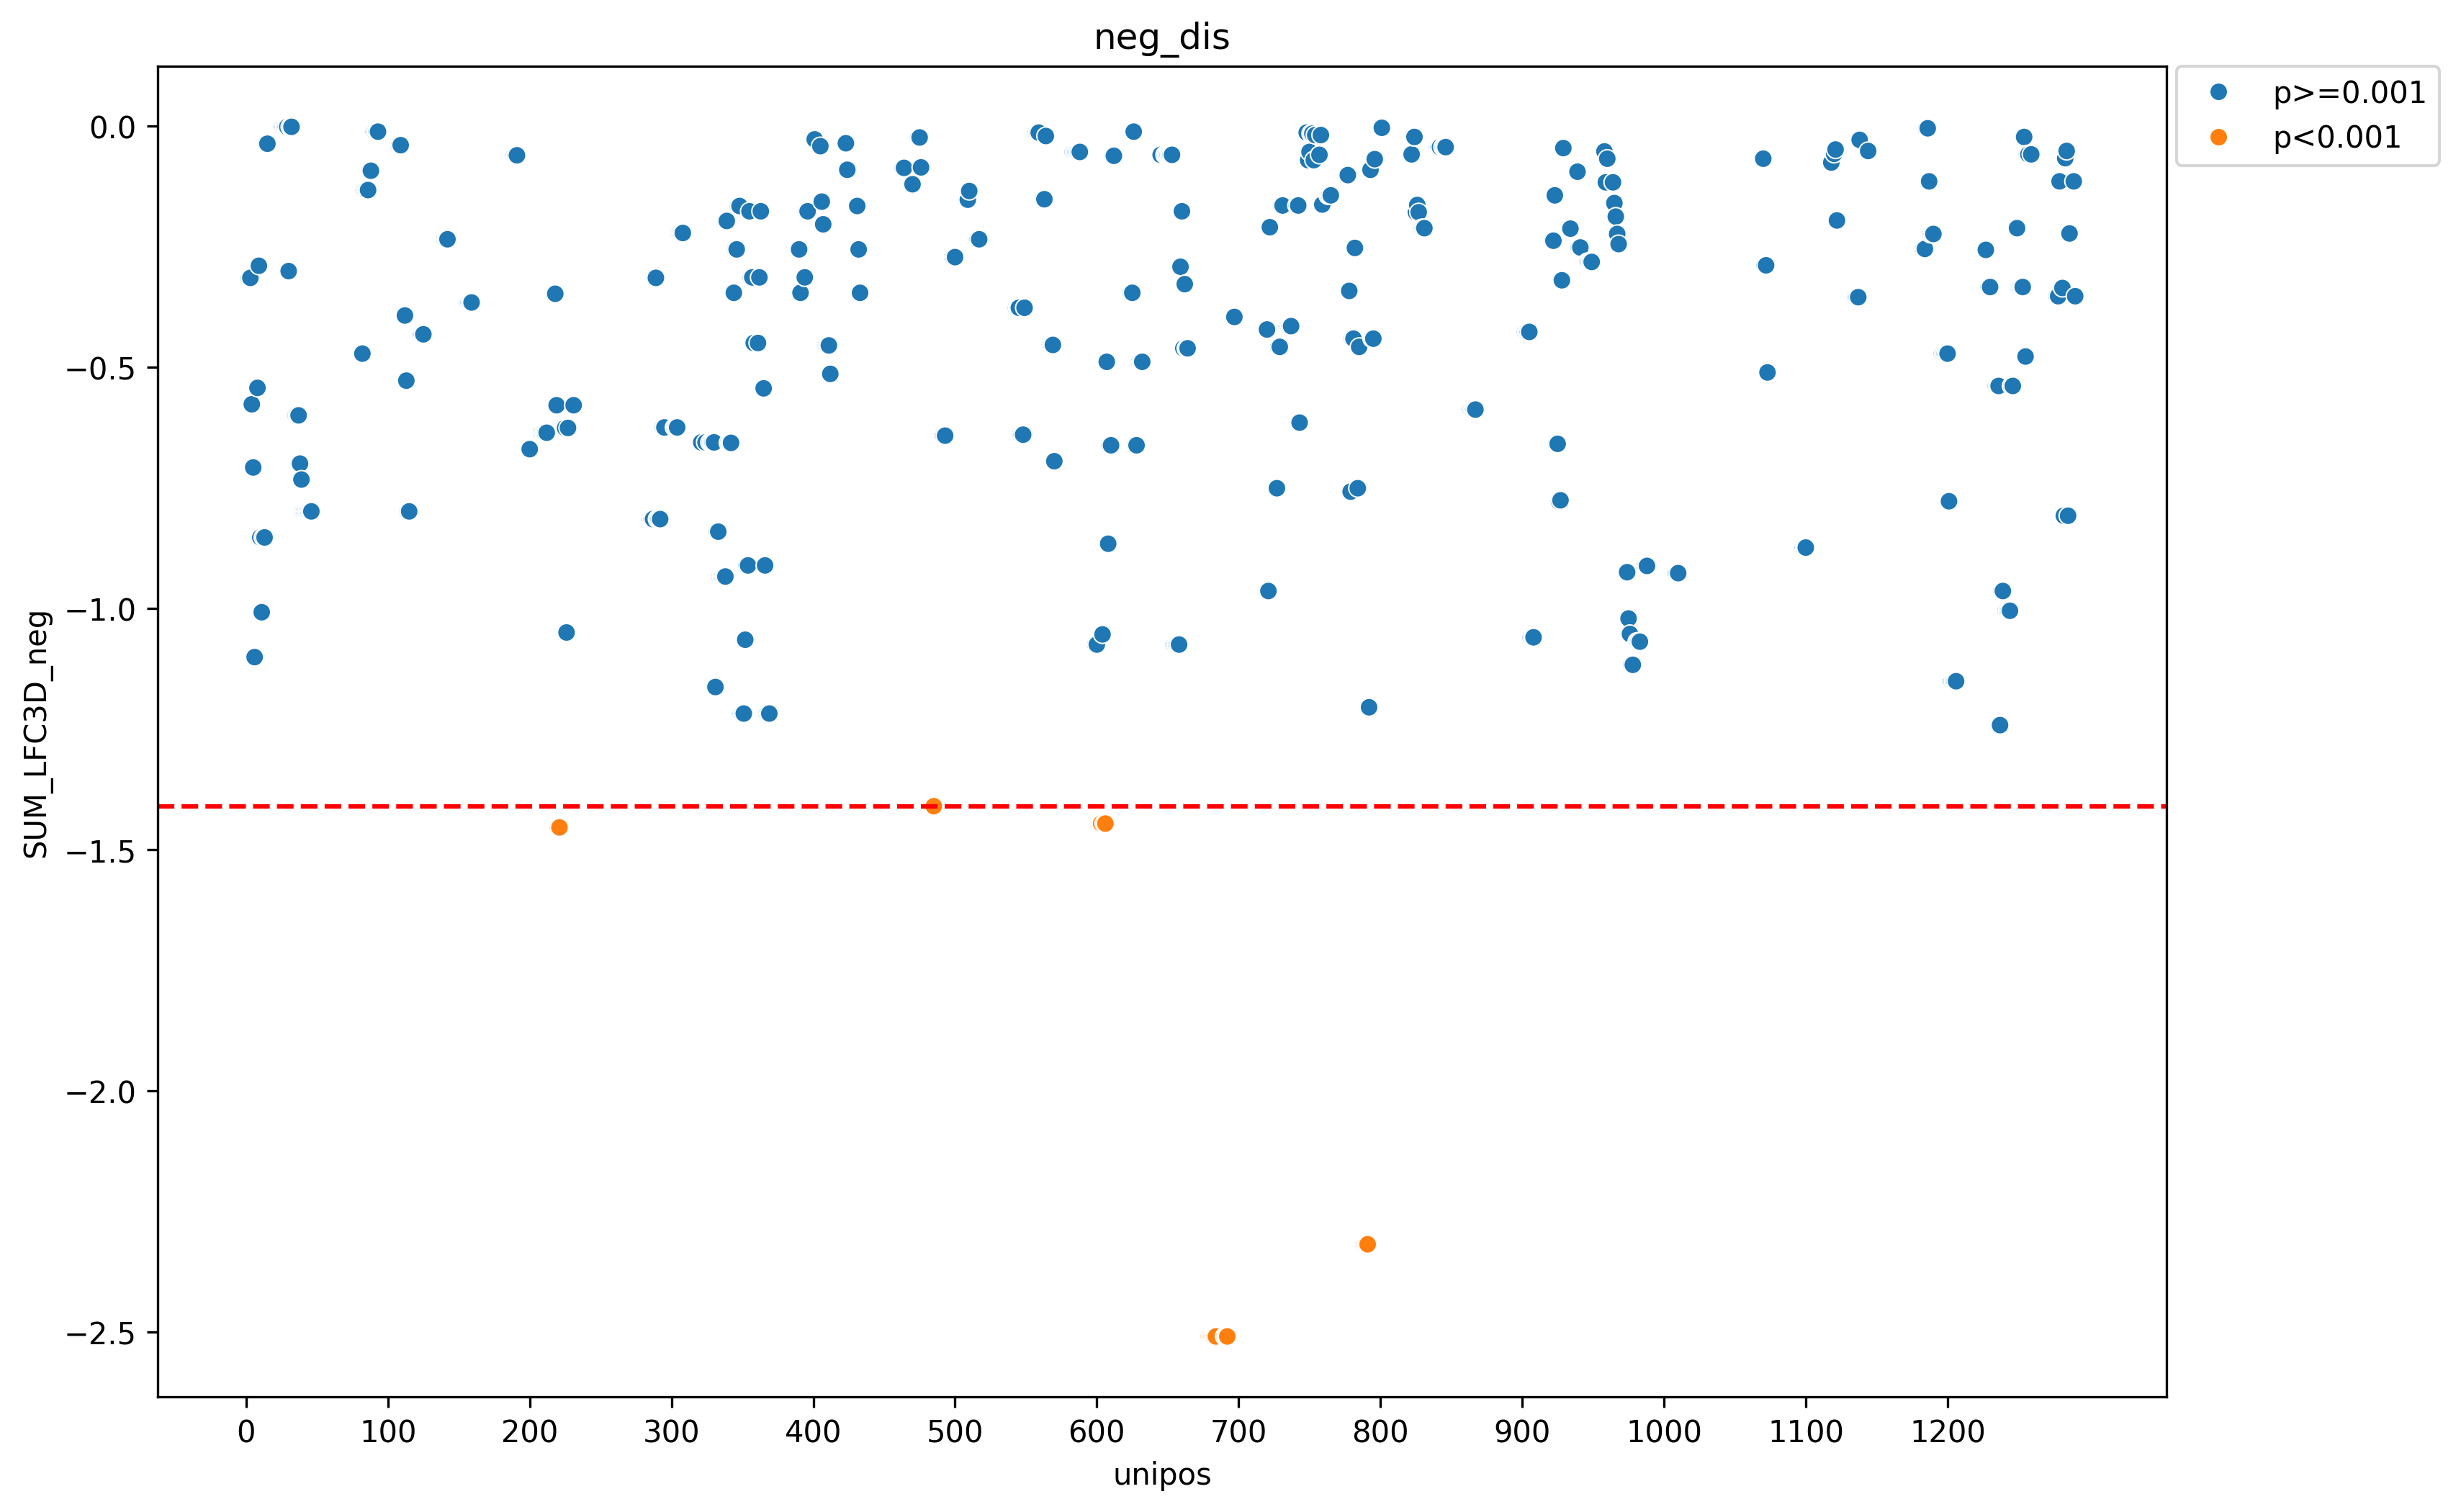

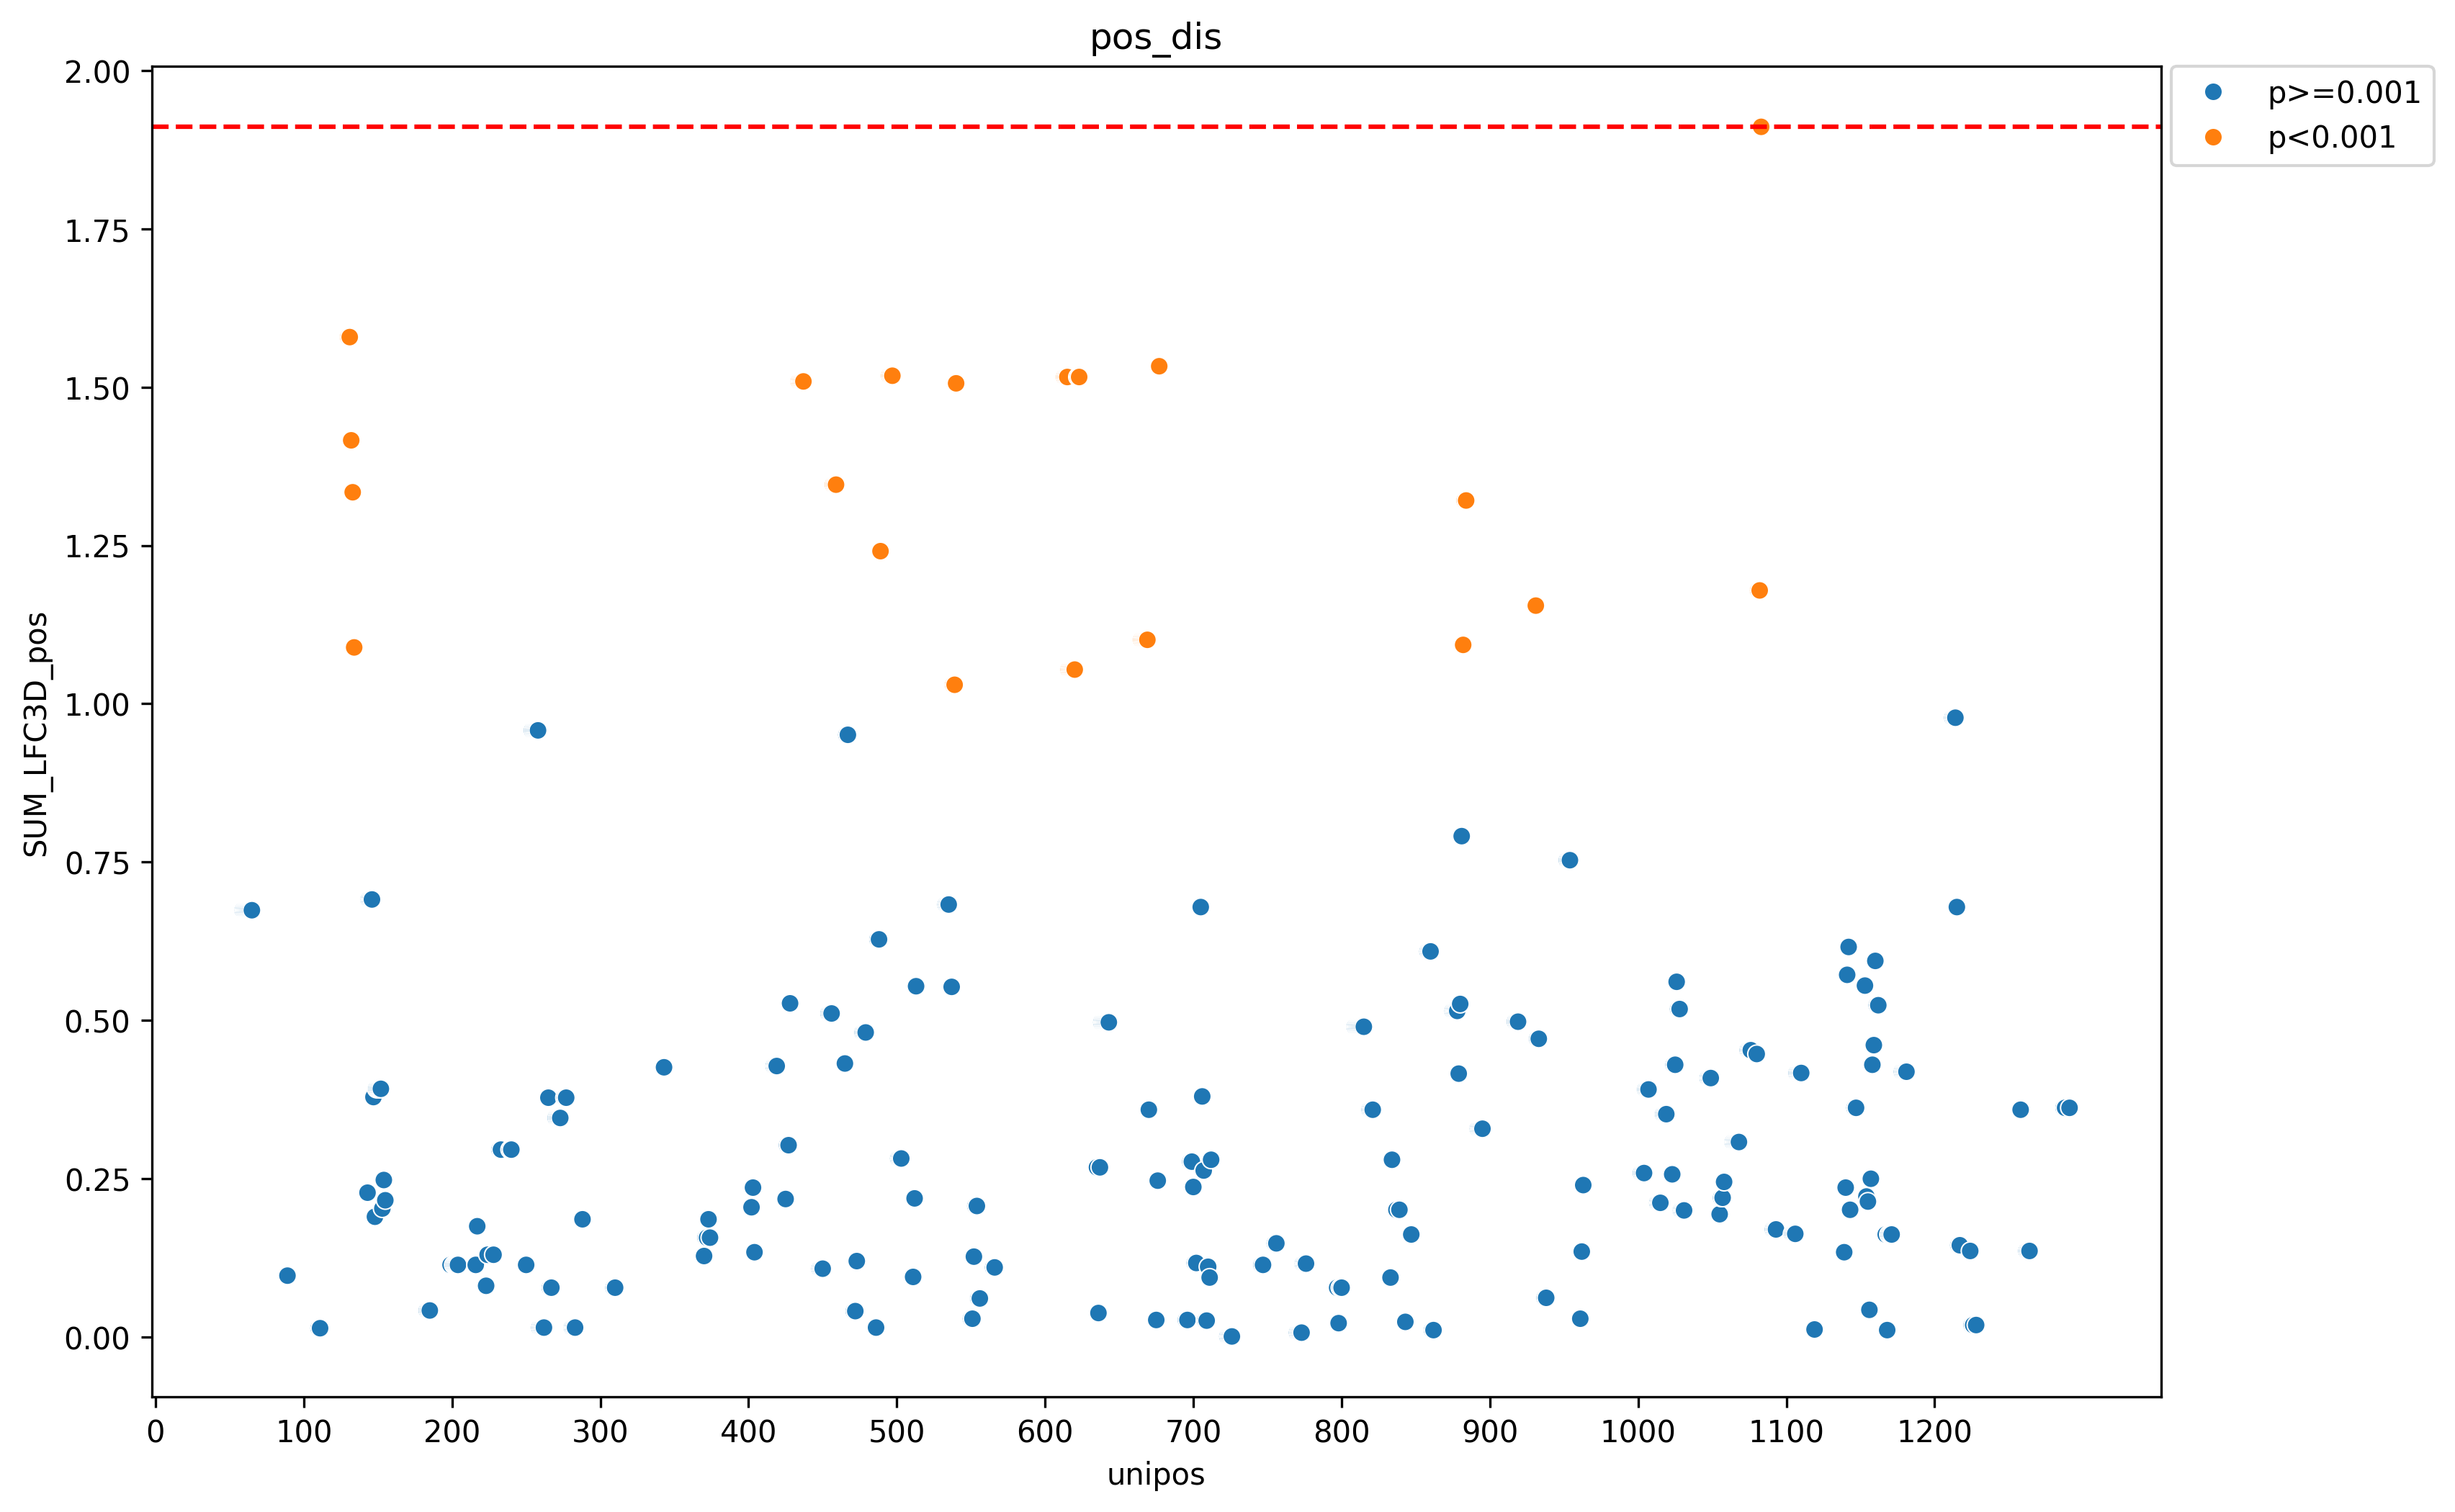

In [4]:
screen1 = 'Human_InVitro_294T_Apobec_D14_Input'
df_LFC_LFC3D = pd.read_csv(f'../tests/SETDB1/LFC3D/SETDB1_{screen1}_LFC_LFC3D_per_Random_LFC3Dr.tsv', sep='\t')

metaaggregation(df_LFC_LFC3D, 
                workdir=workdir, 
                input_gene=input_gene, input_uniprot=input_uniprot, 
                structureid=structureid, 
                input_screen=screen1+'.txt', )
print()

## annotate_spatial_clusters.py (5)